# F20AA Applied Text Analytics: Coursework 2

In [1]:
import pickle
import bz2

import matplotlib.pyplot as plt
import pandas as pd

## 1.   Data Exploration and Visualization

In [2]:
# saving data in a pickle file
""" Train.csv exceeds file size limit on GitHub """

# data = pd.read_csv("Train.csv")
# with bz2.BZ2File("train.pickle", "wb") as f:
#     pickle.dump(data, f)
#     f.close()

' Train.csv exceeds file size limit on GitHub '

In [3]:
# loading data from pickle
with bz2.BZ2File("train.pickle", "rb") as f:
    train = pickle.load(f)
    f.close()

In [4]:
train.head()

,overall,Review
0,5,This a really cool (but time-tested) design. T...
1,5,I liked the first pair so well I bought severa...
2,4,I took them to the range to put them to the te...
3,5,What can you say about a yoga block? These ar...
4,5,After reading many reviews I decided on this l...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222243 entries, 0 to 222242
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  222243 non-null  int64 
 1   Review   222243 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [6]:
train.describe()

,overall
count,222243.000000
mean,4.394771
std,0.985039
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


These tables give us the initial information we need about the dataset - it has two columns, 'overall' which is like a likert scale between 1-5 and is to be used for multiclass classification, and 'Review' which adds onto 'overall' and is a brief subjective opinion of the reviewer on the product. There are only two columns and no missing values, therefore no direct modification needs to be done to the dataset other than preprocessing.

**For explanation purposes, 1-2 will be assumed as negative, 3 as neutral, and 4-5 as positive reviews.**

### Distribution of data

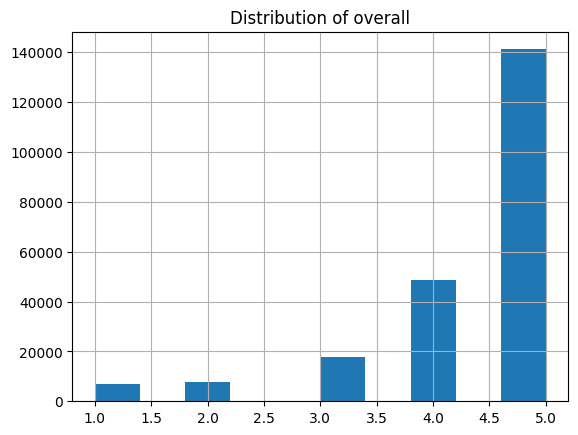

In [7]:
# distribution of overall
train.hist()
plt.title("Distribution of overall")
plt.show()

In [7]:
train['overall'].value_counts()

5    141169
4     48748
3     17947
2      7650
1      6729
Name: overall, dtype: int64

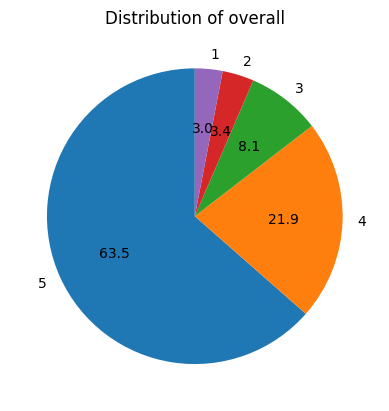

In [8]:
count = train['overall'].value_counts()
plt.pie(count, labels=count.index, autopct="%1.1f", startangle=90)
plt.title("Distribution of overall")
plt.show()

The graphs show that this dataset is extremely unbalanced, with most of the data (~85%) in "classes" 4 and 5. This can prove challenging for our future text classifier, especially for a multi-classification task, as the model may be biased towards the class with the most data and will result to overfitting and inaccurate classification.

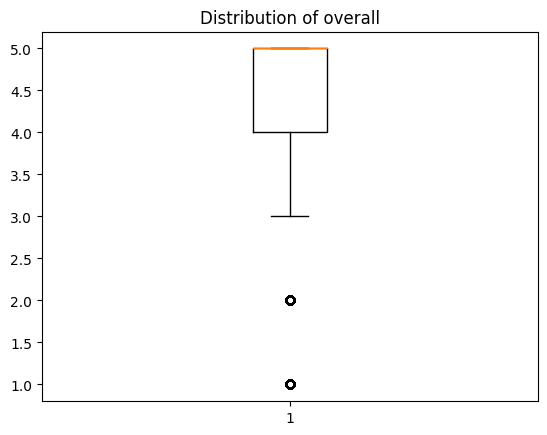

In [9]:
plt.boxplot(train['overall'])
plt.title("Distribution of overall")
plt.show()

A box plot is extremely helpful as it can help us detect any outliers. Here, the plot has marked the minimum and maximum values as 3 and 5 respectively, with most of the data concentrated in classes 4 and 5. As expected, 5 has also been marked as the median as it is the class with the most data. Classes 1 and 2 have been considered as outliers. In most cases, outliers can and should be removed to make sure the classification process can run smoothly and avoid any miss classifications. But, as classes 1 and 2 are the only "negative" classes in this dataset, these outliers cannot be removed, otherwise the data and classifier will render useless.

### Text data

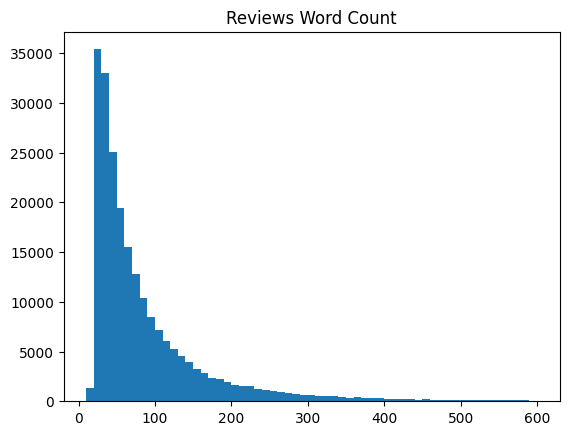

In [26]:
# checking word count
train['Word Count'] = [len(i.split()) for i in list(train['Review'])]

plt.hist(train['Word Count'], bins = range(10, 601, 10))
plt.title("Reviews Word Count")
plt.show()

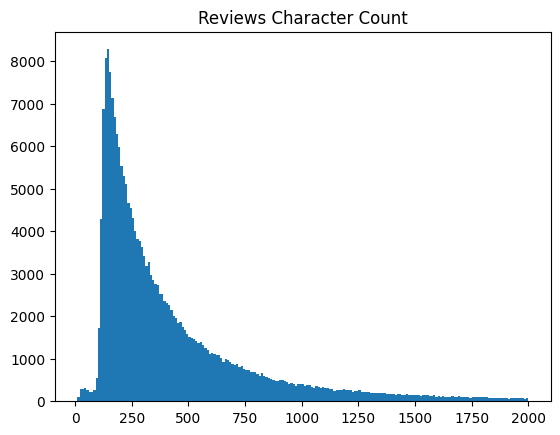

In [35]:
# checking character count
train['Character Count'] = [len(i) for i in list(train['Review'])]

plt.hist(train['Character Count'], bins = range(10, 2001, 10))
plt.title("Reviews Character Count")
plt.show()

Most reviews seem to be short - approx. under 100 words and 500 characters.

### Checking for correlation

In [36]:
train.corr(numeric_only=True)

,overall,Word Count,Character Count
overall,1.000000,-0.072247,-0.069287
Word Count,-0.072247,1.000000,0.997638
Character Count,-0.069287,0.997638,1.000000


Sadly, word and character count seem to have no correlation with the overall scale, therefore these counts will not provide help with classification.

# Text Processing and Normalization

# Vector Space Model and Feature Representation